WEEK 3 --> isea digital

In [ ]:
!pip list
# API key 4a7bd54cce4d729539676545b2584e47f11ebba1

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
accelerate                            1.8.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.1
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           25.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.1.0
astropy-iers-data                     0.2025.6.30.0.

In [ ]:
pip install --upgrade transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 49.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.53.0
    Uninstalling transformers-4.53.0:
      Successfully uninstalled transformers-4.53.0


In [ ]:
import transformers
print(transformers.__version__)

4.53.1


In [ ]:

#libraries for data explore
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

#libraries for Model training and evaluation
import torch
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, DataCollatorWithPadding,
    EarlyStoppingCallback
)


In [ ]:
# 📦 Setup
import pandas as pd
import numpy as np
import torch
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, DataCollatorWithPadding,
    EarlyStoppingCallback
)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("/content/augmented_sms_dataset_noisy.csv")
df.head()

,message,label,category
0,Payment of ₹1582 made successfully to Lutz-Tho...,0,legit
1,Recharge of ₹2056 successful. Enjoy uninterrup...,0,legit
2,Thanks for using Liu and Sons. Your order #480...,0,legit
3,Your account has been suspended. Visit http://...,1,phishing
4,We noticed suspicious login on your account. L...,1,phishing


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Fit and transform the label column
df['label'] = le.fit_transform(df['label'])

# Check encoding (optional)
print(dict(zip(le.classes_, le.transform(le.classes_))))
# Output will likely be: {'legit': 0, 'phishing': 1}

# Save the encoded version
df.to_csv("sms_dataset_encoded_le.csv", index=False)



{'legit': np.int64(0), 'phishing': np.int64(1)}


In [ ]:
# Remove nulls
df.dropna(inplace=True)

df['label'] = df['label'].astype(int)

# Lowercasing only
def clean_text(text):
    return text.lower()

df['text'] = df['text'].apply(clean_text)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2000 non-null   int64 
 1   text      2000 non-null   object
 2   category  2000 non-null   object
 3   label     2000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 62.6+ KB
None


In [ ]:
df.shape

(2000, 4)

In [ ]:
df.tail()

,id,text,category,label
1995,224,pan not linked to aadhaar. click to update: ht...,govt/bank impersonation,1
1996,550,bescom: your electricity bill of ₹1123 is due ...,utilities legit,0
1997,129,swiggy order delivered! rate your experience.,e-commerce legit,0
1998,429,thanks for your payment of ₹799 to zomato. tra...,e-commerce legit,0
1999,902,rbi alert: keep your contact details updated t...,govt/bank legit,0


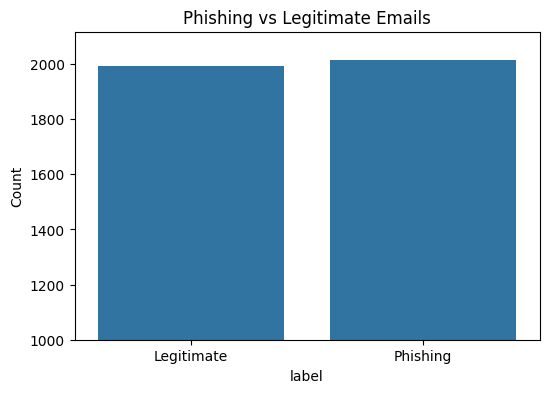

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label') # counts the number of occurrences of each unique value in a column
plt.title('Phishing vs Legitimate Emails')
plt.xticks([0, 1], ['Legitimate', 'Phishing'])
plt.ylabel('Count')
plt.ylim(1000, None)
plt.show()

In [ ]:
# 🧹 Text Preprocessing
stop_words = set(stopwords.words('hinglish'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "URL", text)
    text = re.sub(r"\b(rs\.?|inr)?\s?\d+[kKmM]?\b", "AMOUNT", text)
    text = re.sub(r"\b\d{4,}\b", "NUMBER", text)
    text = re.sub(r"\+?\d[\d -]{8,}\d", "PHONE", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join([w for w in text.split() if w not in stop_words])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


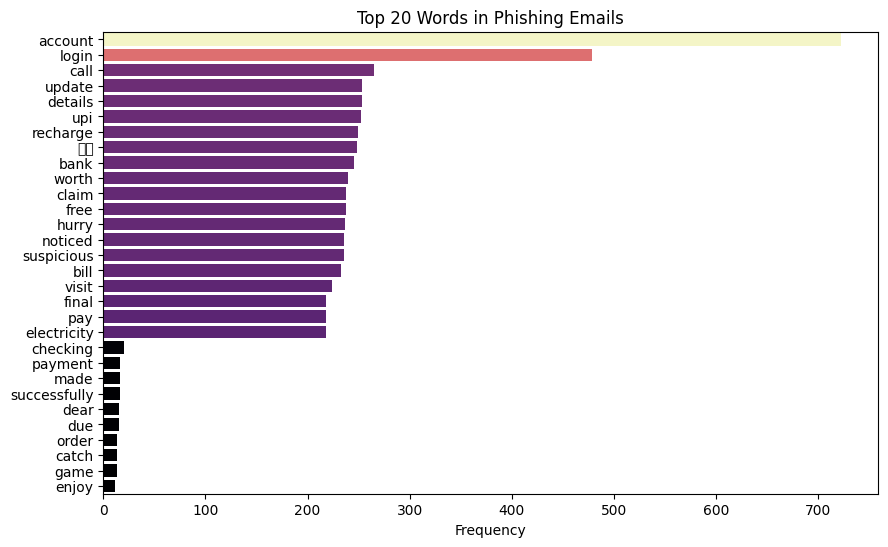

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


stop_words = set(stopwords.words('hinglish'))  #e.g., "the", "is", "and"

# Combine all phishing emails: Joins all texts into one string → converts to lowercase → splits into words
phishing_words = ' '.join(df[df['label']==1]['message']).lower().split() #Selects only phishing emails (where label == 1)

filtered_words = [word for word in phishing_words if word.isalpha() and word not in stop_words] #Alphabetic words (removes numbers, punctuation)

word_freq = Counter(filtered_words).most_common(30)

# Barplot of top words
words, counts = zip(*word_freq)  #Unpacks the 20 most common word–count pairs into two separate lists: words and counts
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words),hue =list(counts), palette='magma',legend=False)
plt.title('Top 20 Words in Phishing Emails')
plt.xlabel('Frequency')
plt.show()

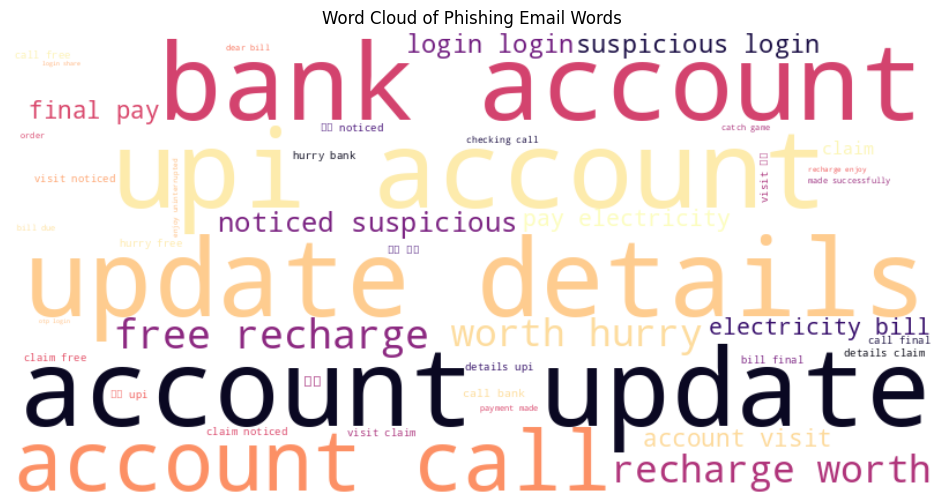

In [ ]:
from wordcloud import WordCloud

# Join all filtered phishing words into a single string
wordcloud_text = ' '.join(filtered_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(wordcloud_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Phishing Email Words')
plt.show()

In [ ]:
# 2. Stratified train/val/test split
train_val_texts, test_texts, train_val_labels, test_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(), test_size=0.2, stratify=df['label'], random_state=21)

train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_val_texts, train_val_labels, test_size=0.125, stratify=train_val_labels, random_state=42)

In [ ]:
#Step 3: Tokenizer and model (use DistilBERT)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# 4. Tokenize
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

In [ ]:
print(train_encodings['input_ids'][0])          # View input IDs of the first text
print(train_encodings['attention_mask'][0])

[101, 3477, 2115, 3806, 3021, 1997, 1576, 26187, 2549, 2077, 6049, 2251, 1012, 1011, 6522, 3806, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# 5. Dataset
class SMSDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = SMSDataset(train_encodings, train_labels)
val_dataset = SMSDataset(val_encodings, val_labels)

In [ ]:
# 6. Evaluation metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1, 'precision': precision, 'recall': recall}

In [ ]:
# 7. Training arguments (anti-overfitting)
from transformers import TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="precision",
    save_strategy="epoch",
    save_total_limit=1,
    load_best_model_at_end=True,
    metric_for_best_model="presse",
    greater_is_better=True,
    num_train_epochs=3,                      # Shorter training time
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    weight_decay=0.01,
    warmup_steps=200,                        # Gradual LR increase
    logging_dir='./logs',
    logging_strategy="epoch",
    report_to="none"
)

In [ ]:

# 8. Trainer with early stopping
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

/tmp/ipython-input-23-2214133276.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:

# 9. Train
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.005400,0.001496,1.000000,1.000000,1.000000,1.000000
2,0.001000,0.000292,1.000000,1.000000,1.000000,1.000000
3,0.000300,0.000138,1.000000,1.000000,1.000000,1.000000


TrainOutput(global_step=264, training_loss=0.0022045296870849347, metrics={'train_runtime': 866.1435, 'train_samples_per_second': 4.849, 'train_steps_per_second': 0.305, 'total_flos': 30426105628800.0, 'train_loss': 0.0022045296870849347, 'epoch': 3.0})

In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# 1. Load your CSV
df = pd.read_csv("/content/sms_dataset_encoded_le.csv")  # Make sure labels are 0/1

# 2. Train-Test Split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(), test_size=0.2, stratify=df['label'], random_state=42
)

# 3. Load Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# 4. Tokenize
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

# 5. Convert to HuggingFace Dataset format
train_dataset = Dataset.from_dict({'input_ids': train_encodings['input_ids'],
                                   'attention_mask': train_encodings['attention_mask'],
                                   'labels': train_labels})
val_dataset = Dataset.from_dict({'input_ids': val_encodings['input_ids'],
                                 'attention_mask': val_encodings['attention_mask'],
                                 'labels': val_labels})

# 6. Load Pretrained Model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# 7. Evaluation Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = torch.argmax(torch.tensor(logits), axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# 8. Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# 9. Data collator for padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# 10. Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# 11. Train the Model
trainer.train()

# 12. Evaluate
trainer.evaluate()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-32-3605692330.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.000200,0.000115,1.000000,1.000000,1.000000,1.000000
2,0.000100,0.000062,1.000000,1.000000,1.000000,1.000000


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.000200,0.000115,1.000000,1.000000,1.000000,1.000000
2,0.000100,0.000062,1.000000,1.000000,1.000000,1.000000
3,0.000100,0.000052,1.000000,1.000000,1.000000,1.000000


{'eval_loss': 5.234609488979913e-05,
 'eval_accuracy': 1.0,
 'eval_f1': 1.0,
 'eval_precision': 1.0,
 'eval_recall': 1.0,
 'eval_runtime': 31.6078,
 'eval_samples_per_second': 12.655,
 'eval_steps_per_second': 0.791,
 'epoch': 3.0}

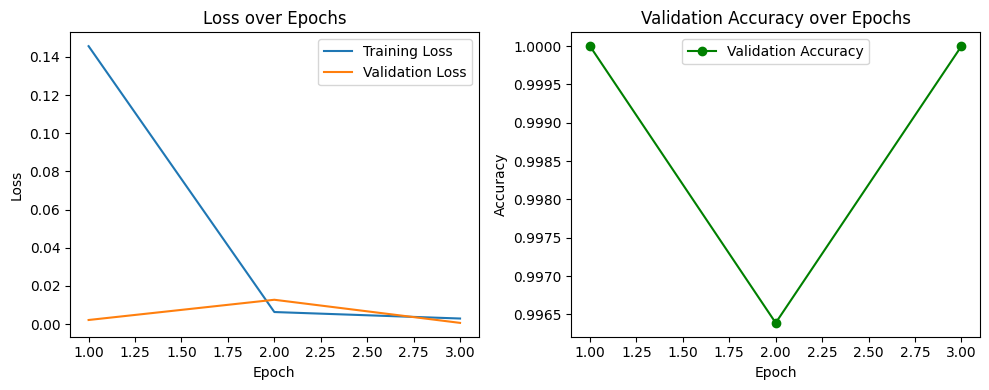

In [ ]:
import matplotlib.pyplot as plt
# Extract logs
log_history = trainer.state.log_history

# Gather data
train_loss = [entry['loss'] for entry in log_history if 'loss' in entry]
eval_loss = [entry['eval_loss'] for entry in log_history if 'eval_loss' in entry]
eval_acc  = [entry['eval_accuracy'] for entry in log_history if 'eval_accuracy' in entry]
epochs = list(range(1, len(eval_loss)+1))

# Plot loss
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, eval_loss, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, eval_acc, marker='o', color='green', label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Save model and tokenizer
model.save_pretrained("./final_model")
tokenizer.save_pretrained("./final_model")

('./final_model/tokenizer_config.json',
 './final_model/special_tokens_map.json',
 './final_model/vocab.txt',
 './final_model/added_tokens.json')

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer
model = BertForSequenceClassification.from_pretrained("./final_model")
tokenizer = BertTokenizer.from_pretrained("./final_model")

In [ ]:
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [ ]:
test_dataset = SMSDataset(test_encodings, test_labels)

OVER FITTING OF HEAVY BERT MODEL

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Run predictions on the test set
test_results = trainer.predict(test_dataset)

# Extract predicted class labels
y_pred = test_results.predictions.argmax(axis=1)
y_true = test_labels  # Make sure test_labels is a list of integers

# Print all core metrics
print("Final Test Evaluation Metrics:\n")
print("Accuracy       :", accuracy_score(y_true, y_pred))
print("Precision      :", precision_score(y_true, y_pred))
print("Recall         :", recall_score(y_true, y_pred))
print("F1 Score       :", f1_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Legitimate", "Phishing"]))

Final Test Evaluation Metrics:

Accuracy       : 0.9981949458483754
Precision      : 0.9965635738831615
Recall         : 1.0
F1 Score       : 0.9982788296041308

Classification Report:
               precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00       264
    Phishing       1.00      1.00      1.00       290

    accuracy                           1.00       554
   macro avg       1.00      1.00      1.00       554
weighted avg       1.00      1.00      1.00       554



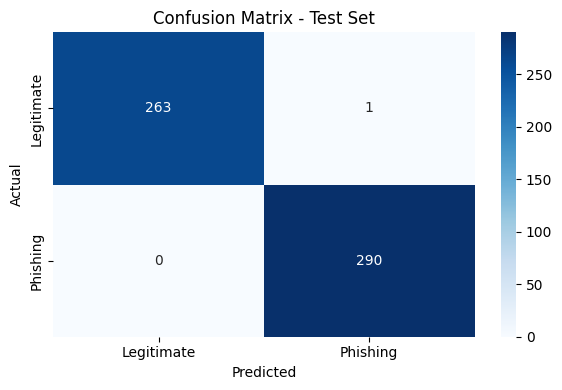

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = test_results.predictions.argmax(axis=1)
print(classification_report(test_labels, y_pred, target_names=["Legitimate", "Phishing"]))

              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00       264
    Phishing       1.00      1.00      1.00       290

    accuracy                           1.00       554
   macro avg       1.00      1.00      1.00       554
weighted avg       1.00      1.00      1.00       554



In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load saved model and tokenizer
model = BertForSequenceClassification.from_pretrained("./final_model")
tokenizer = BertTokenizer.from_pretrained("./final_model")

model.eval()  # Set to evaluation mode


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
def predict_message(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=64)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        pred_class = torch.argmax(probs, dim=1).item()
        confidence = probs[0][pred_class].item()

    label = "Phishing" if pred_class == 1 else "Legit"
    return label, round(confidence * 100, 2)


In [ ]:
test_messages = [
    "Dear user, your OTP is 990,Kindly DO NOT SHARE with anyone",
    "project kar liya?",
    "Aapka number lucky draw me select hua hai. Click now!"
]

for msg in test_messages:
    label, conf = predict_message(msg)
    print(f"[{label}] {msg} ({conf}%)")


[Legit] Dear user, your OTP is 990,Kindly DO NOT SHARE with anyone (99.28%)
[Legit] project kar liya? (99.65%)
[Phishing] Aapka number lucky draw me select hua hai. Click now! (96.7%)


In [ ]:
msgs = [
    "🙏 dear user, pls check ur bank link bcoz it's blocked!!",
    "project kar liya?",
    "Aapka number lucky draw me select hua hai. Click now!",
    "mujhe laga aapka msg fake hai par fir bhi click kiya 😐",
    "Your parcel is held by customs. Pay ₹50 here → scamlink.com",
    "Call karna when free. Missed you today.",
    "Don't share this OTP: 493920. Even we won't ask for it."
]

for m in msgs:
    label, conf = predict_message(m)
    print(f"[{label} - {conf}%] {m}")


[Phishing - 99.38%] 🙏 dear user, pls check ur bank link bcoz it's blocked!!
[Legit - 99.53%] Dear user, click here to verify your bank details now
[Legit - 99.65%] project kar liya?
[Phishing - 96.7%] Aapka number lucky draw me select hua hai. Click now!
[Legit - 74.64%] mujhe laga aapka msg fake hai par fir bhi click kiya 😐
[Phishing - 98.95%] Your parcel is held by customs. Pay ₹50 here → scamlink.com
[Legit - 99.66%] Call karna when free. Missed you today.
[Legit - 98.97%] Don't share this OTP: 493920. Even we won't ask for it.


In [ ]:
test_messages = [
    "Dear user, Kindly DO NOT share this OTP: 493920. Even we won't ask for it.",
    "Dear user, click here to verify your bank details now",
    "project kar liya?",
    "Aapka number lucky draw me select hua hai. Click now!",
]

for msg in test_messages:
    label, conf = predict_message(msg)
    print(f"[{label}] {msg} ({conf}%)")


[Legit] Dear user, Kindly DO NOT share this OTP: 493920. Even we won't ask for it. (99.03%)
[Legit] Dear user, click here to verify your bank details now (99.53%)
[Legit] project kar liya? (99.65%)
[Phishing] Aapka number lucky draw me select hua hai. Click now! (96.7%)


In [ ]:
from transformers import AutoModelForSequenceClassification

def model_init():
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


TESETING DIFF MODELS

In [ ]:
# 📦 Required Libraries
import pandas as pd
import numpy as np
import torch
import re
import string
import nltk
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, DataCollatorWithPadding,
    EarlyStoppingCallback
)

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# 📥 Load the dataset
df = pd.read_csv("augmented_sms_dataset.csv")

# 🧹 Clean and Normalize SMS Texts
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "URL", text)
    text = re.sub(r"\b(rs\.?|inr)?\s?\d+[kKmM]?\b", "AMOUNT", text)
    text = re.sub(r"\b\d{4,}\b", "NUMBER", text)
    text = re.sub(r"\+?\d[\d -]{8,}\d", "PHONE", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join([w for w in text.split() if w not in stop_words])
    return text

df["clean_message"] = df["message"].apply(clean_text)

# 🧠 Tokenizer and Model Init
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def model_init():
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# 🧱 Dataset Wrapper
class SMSDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

# 📊 Metric Function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# ⚙️ Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=1,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    num_train_epochs=4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    weight_decay=0.01,
    warmup_steps=200,
    logging_dir="./logs",
    logging_strategy="epoch",
    report_to="none"
)

# 🔁 5-Fold Cross-Validation
X = df["clean_message"].tolist()
y = df["label"].tolist()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_metrics = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\n🧪 Fold {fold + 1}")

    train_texts = [X[i] for i in train_idx]
    val_texts = [X[i] for i in val_idx]
    train_labels = [y[i] for i in train_idx]
    val_labels = [y[i] for i in val_idx]

    train_encodings = tokenizer(train_texts, truncation=True, padding=True)
    val_encodings = tokenizer(val_texts, truncation=True, padding=True)

    train_dataset = SMSDataset(train_encodings, train_labels)
    val_dataset = SMSDataset(val_encodings, val_labels)

    trainer = Trainer(
        model=model_init(),
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer,
        data_collator=DataCollatorWithPadding(tokenizer),
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
    )

    trainer.train()
    metrics = trainer.evaluate()
    print(f"📈 Fold {fold + 1} metrics:", metrics)
    all_metrics.append(metrics)

# 📉 Final Performance Summary
final_df = pd.DataFrame(all_metrics)
print("\n🔚 Average Metrics Across Folds:")
print(final_df.mean())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



🧪 Fold 1


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-39-2374355689.py:103: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.263600,0.001855,1.000000,1.000000,1.000000,1.000000
2,0.001200,0.000436,1.000000,1.000000,1.000000,1.000000
3,0.000500,0.000246,1.000000,1.000000,1.000000,1.000000


📈 Fold 1 metrics: {'eval_loss': 0.0018548992229625583, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 44.0857, 'eval_samples_per_second': 18.146, 'eval_steps_per_second': 1.134, 'epoch': 3.0}

🧪 Fold 2


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-39-2374355689.py:103: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.272400,0.002272,1.000000,1.000000,1.000000,1.000000
2,0.002100,0.000601,1.000000,1.000000,1.000000,1.000000
3,0.000700,0.000356,1.000000,1.000000,1.000000,1.000000


📈 Fold 2 metrics: {'eval_loss': 0.002272459678351879, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 43.926, 'eval_samples_per_second': 18.212, 'eval_steps_per_second': 1.138, 'epoch': 3.0}

🧪 Fold 3


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-39-2374355689.py:103: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.261500,0.002357,1.000000,1.000000,1.000000,1.000000
2,0.001600,0.000593,1.000000,1.000000,1.000000,1.000000
3,0.000700,0.000352,1.000000,1.000000,1.000000,1.000000


📈 Fold 3 metrics: {'eval_loss': 0.002356921089813113, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 48.9901, 'eval_samples_per_second': 16.33, 'eval_steps_per_second': 1.021, 'epoch': 3.0}

🧪 Fold 4


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-39-2374355689.py:103: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.267200,0.002275,1.000000,1.000000,1.000000,1.000000
2,0.001500,0.000567,1.000000,1.000000,1.000000,1.000000


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.267200,0.002275,1.000000,1.000000,1.000000,1.000000
2,0.001500,0.000567,1.000000,1.000000,1.000000,1.000000
3,0.000600,0.000339,1.000000,1.000000,1.000000,1.000000


📈 Fold 4 metrics: {'eval_loss': 0.002274905564263463, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 46.252, 'eval_samples_per_second': 17.297, 'eval_steps_per_second': 1.081, 'epoch': 3.0}

🧪 Fold 5


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-39-2374355689.py:103: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.264800,0.002356,1.000000,1.000000,1.000000,1.000000
2,0.001600,0.000581,1.000000,1.000000,1.000000,1.000000
3,0.000600,0.000349,1.000000,1.000000,1.000000,1.000000


📈 Fold 5 metrics: {'eval_loss': 0.0023561804555356503, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 43.17, 'eval_samples_per_second': 18.531, 'eval_steps_per_second': 1.158, 'epoch': 3.0}

🔚 Average Metrics Across Folds:
eval_loss                   0.002223
eval_accuracy               1.000000
eval_f1                     1.000000
eval_precision              1.000000
eval_recall                 1.000000
eval_runtime               45.284760
eval_samples_per_second    17.703200
eval_steps_per_second       1.106400
epoch                       3.000000
dtype: float64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


model.safetensors:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

/tmp/ipython-input-20-3931746709.py:93: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.614000,0.484145,0.932668,0.933498,0.928922,0.938119
2,0.397800,0.306184,0.932668,0.933333,0.931034,0.935644
3,0.259800,0.252607,0.932668,0.933333,0.931034,0.935644



📊 Test Set Metrics:
{'eval_loss': 0.48414531350135803, 'eval_accuracy': 0.9326683291770573, 'eval_f1': 0.9334975369458128, 'eval_precision': 0.928921568627451, 'eval_recall': 0.9381188118811881, 'eval_runtime': 1.1322, 'eval_samples_per_second': 708.332, 'eval_steps_per_second': 45.044, 'epoch': 3.0}

📄 Classification Report:
              precision    recall  f1-score   support

       Legit       0.94      0.93      0.93       398
    Phishing       0.93      0.94      0.93       404

    accuracy                           0.93       802
   macro avg       0.93      0.93      0.93       802
weighted avg       0.93      0.93      0.93       802



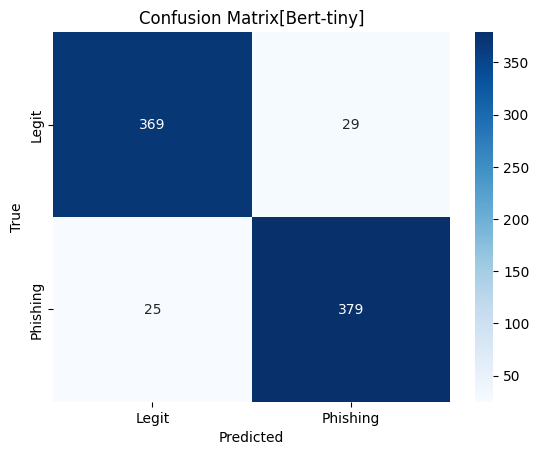

In [ ]:
# 📦 Required Libraries
import pandas as pd
import numpy as np
import torch
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, DataCollatorWithPadding,
    EarlyStoppingCallback
)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# 🧹 Clean text
stop_words = set(stopwords.words('hinglish'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "URL", text)
    text = re.sub(r"\b(rs\.?|inr)?\s?\d+[kKmM]?\b", "AMOUNT", text)
    text = re.sub(r"\b\d{4,}\b", "NUMBER", text)
    text = re.sub(r"\+?\d[\d -]{8,}\d", "PHONE", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join([w for w in text.split() if w not in stop_words])
    return text

# 📥 Load noisy dataset
df = pd.read_csv("augmented_sms_dataset_noisy.csv")
df["clean_message"] = df["message"].apply(clean_text)

# 🧪 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_message"], df["label"], test_size=0.2, stratify=df["label"], random_state=42
)

# 🧱 Dataset Class
class SMSDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

# 🧠 Load `bert-tiny` model
model_name = "prajjwal1/bert-tiny"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# 🔁 Encode datasets
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True)

train_dataset = SMSDataset(train_encodings, y_train.tolist())
test_dataset = SMSDataset(test_encodings, y_test.tolist())

# 📊 Evaluation metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# ⚙️ Training setup
training_args = TrainingArguments(
    output_dir="./bert_tiny_results",
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=1,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./bert_tiny_logs",
    logging_strategy="epoch",
    report_to="none"
)

# 🚀 Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer),
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# ✅ Train
trainer.train()

# 📈 Evaluate
metrics = trainer.evaluate()
print("\n📊 Test Set Metrics:")
print(metrics)

# 🔍 Detailed Report
preds = trainer.predict(test_dataset).predictions.argmax(-1)
print("\n📄 Classification Report:")
print(classification_report(y_test, preds, target_names=["Legit", "Phishing"]))

# 📊 Confusion Matrix
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Phishing"], yticklabels=["Legit", "Phishing"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix[Bert-tiny]")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
# Extract logs
log_history = trainer.state.log_history

# Gather data
train_loss = [entry['loss'] for entry in log_history if 'loss' in entry]
eval_loss = [entry['eval_loss'] for entry in log_history if 'eval_loss' in entry]
eval_acc  = [entry['eval_accuracy'] for entry in log_history if 'eval_accuracy' in entry]
epochs = list(range(1, len(eval_loss)+1))

# Plot loss
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, eval_loss, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, eval_acc, marker='o', color='green', label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy over Epochs")
plt.legend()

plt.tight_layout()

In [ ]:
# 📦 Save model and tokenizer
save_path = "./phishing_bert_tiny_model"
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)


('./phishing_bert_tiny_model/tokenizer_config.json',
 './phishing_bert_tiny_model/special_tokens_map.json',
 './phishing_bert_tiny_model/vocab.txt',
 './phishing_bert_tiny_model/added_tokens.json',
 './phishing_bert_tiny_model/tokenizer.json')

In [ ]:
import zipfile
import os

def zip_model_folder(folder_path, output_zip):
    with zipfile.ZipFile(output_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(folder_path):
            for file in files:
                abs_path = os.path.join(root, file)
                rel_path = os.path.relpath(abs_path, folder_path)
                zipf.write(abs_path, arcname=rel_path)

zip_model_folder("phishing_bert_tiny_model", "phishing_bert_tiny_model.zip")
print("✅ Model zipped as phishing_bert_tiny_model.zip")


✅ Model zipped as phishing_bert_tiny_model.zip


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/IndicBERTv2-mlm-only and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/tmp/ipython-input-45-1893397356.py:93: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.260300,0.322336,0.936409,0.937115,0.933661,0.940594
2,0.205300,0.274422,0.936409,0.937115,0.933661,0.940594
3,0.191900,0.264664,0.936409,0.937115,0.933661,0.940594



📊 Test Metrics:
{'eval_loss': 0.3223363161087036, 'eval_accuracy': 0.9364089775561097, 'eval_f1': 0.93711467324291, 'eval_precision': 0.9336609336609336, 'eval_recall': 0.9405940594059405, 'eval_runtime': 68.2048, 'eval_samples_per_second': 11.759, 'eval_steps_per_second': 0.748, 'epoch': 3.0}

Classification Report:
              precision    recall  f1-score   support

       Legit       0.94      0.93      0.94       398
    Phishing       0.93      0.94      0.94       404

    accuracy                           0.94       802
   macro avg       0.94      0.94      0.94       802
weighted avg       0.94      0.94      0.94       802



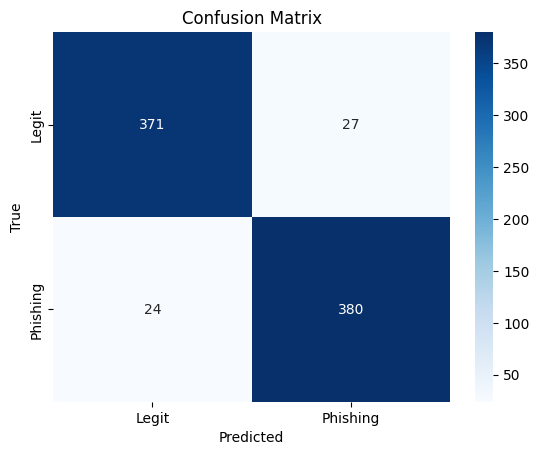

In [ ]:
# 📦 Setup
import pandas as pd
import numpy as np
import torch
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, DataCollatorWithPadding,
    EarlyStoppingCallback
)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# 🧹 Text Preprocessing
stop_words = set(stopwords.words('hinglish'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "URL", text)
    text = re.sub(r"\b(rs\.?|inr)?\s?\d+[kKmM]?\b", "AMOUNT", text)
    text = re.sub(r"\b\d{4,}\b", "NUMBER", text)
    text = re.sub(r"\+?\d[\d -]{8,}\d", "PHONE", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join([w for w in text.split() if w not in stop_words])
    return text

# 📥 Load Dataset
df = pd.read_csv("augmented_sms_dataset_noisy.csv")
df["clean_message"] = df["message"].apply(clean_text)

# 📊 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_message"], df["label"], test_size=0.2, stratify=df["label"], random_state=42
)

# 🧱 Dataset Class
class SMSDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

# 🔁 Load IndicBERTv2
model_name = "ai4bharat/IndicBERTv2-mlm-only"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# 🔄 Tokenize
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True)

train_dataset = SMSDataset(train_encodings, y_train.tolist())
test_dataset = SMSDataset(test_encodings, y_test.tolist())

# 📊 Metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# ⚙️ Training Arguments
training_args = TrainingArguments(
    output_dir="./indicbert_results",
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=1,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    num_train_epochs=4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs_indicbert",
    logging_strategy="epoch",
    report_to="none"
)

# 🚀 Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer),
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# ✅ Train
trainer.train()

# 📈 Evaluate
metrics = trainer.evaluate()
print("\n📊 Test Metrics:")
print(metrics)

# 📄 Report
preds = trainer.predict(test_dataset).predictions.argmax(-1)
print("\nClassification Report:")
print(classification_report(y_test, preds, target_names=["Legit", "Phishing"]))

# 📉 Confusion Matrix
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Phishing"], yticklabels=["Legit", "Phishing"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
